# importing libraries

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data loading and its overview

In [3]:
df = pd.read_csv("ev-data.csv")

In [4]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [6]:
df.shape

(103, 14)

In [8]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [9]:
print(df.isnull().sum())

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64


# EDA

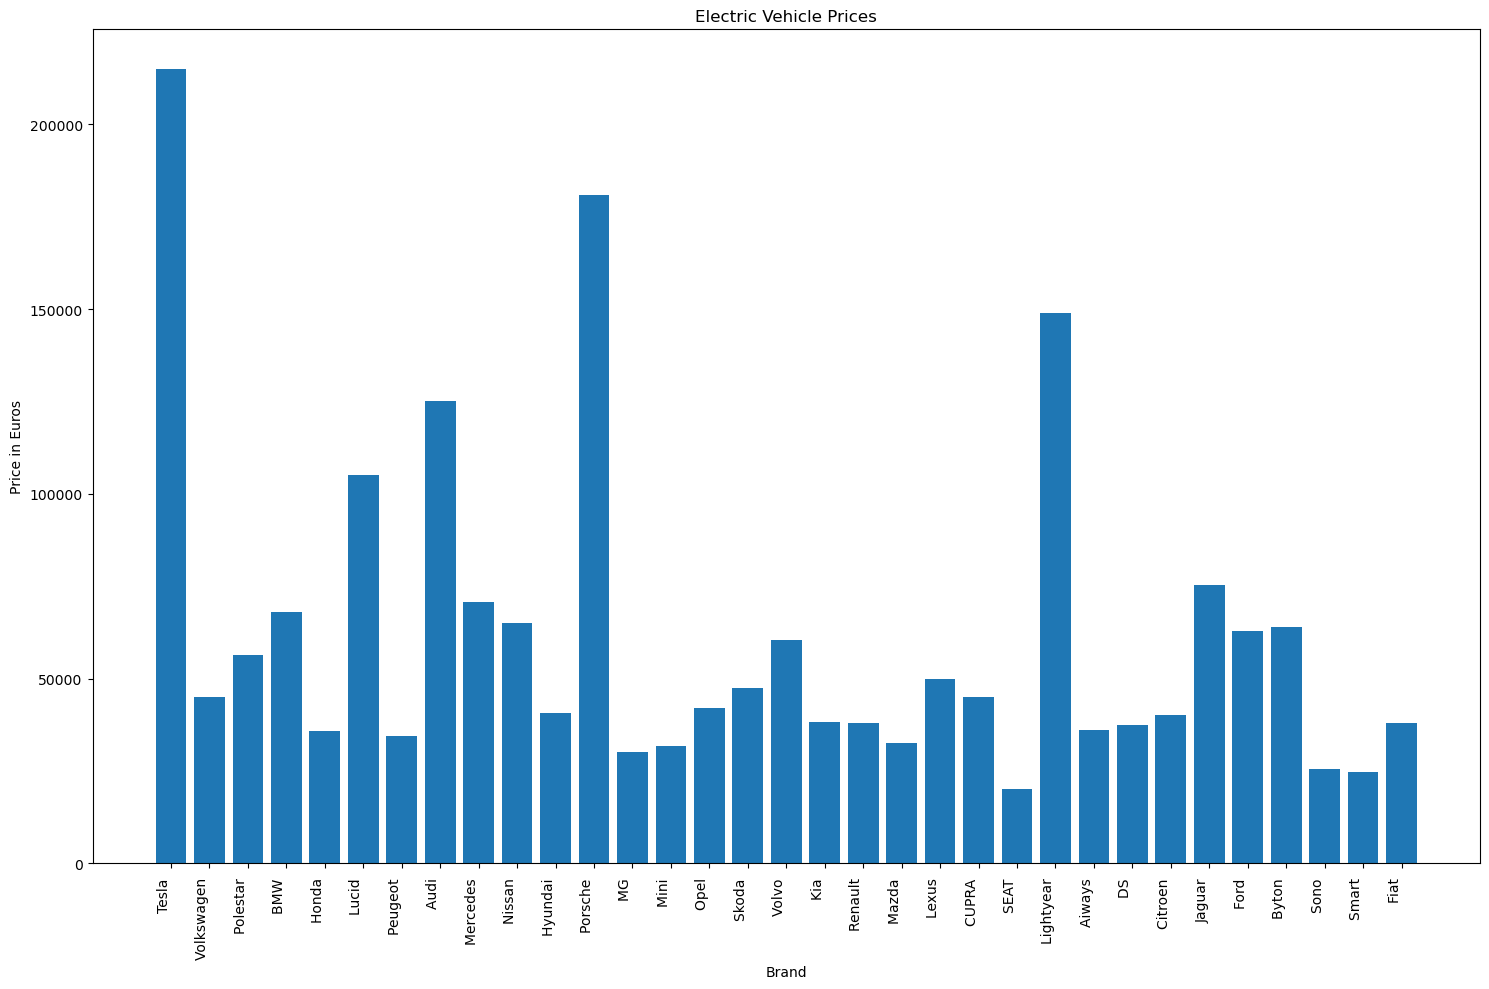

In [10]:
plt.figure(figsize=(15,10))
plt.bar(df['Brand'],df['PriceEuro'])
plt.xlabel('Brand')
plt.ylabel('Price in Euros')
plt.title('Electric Vehicle Prices')
plt.xticks(rotation=90, ha='right') 
plt.tight_layout()

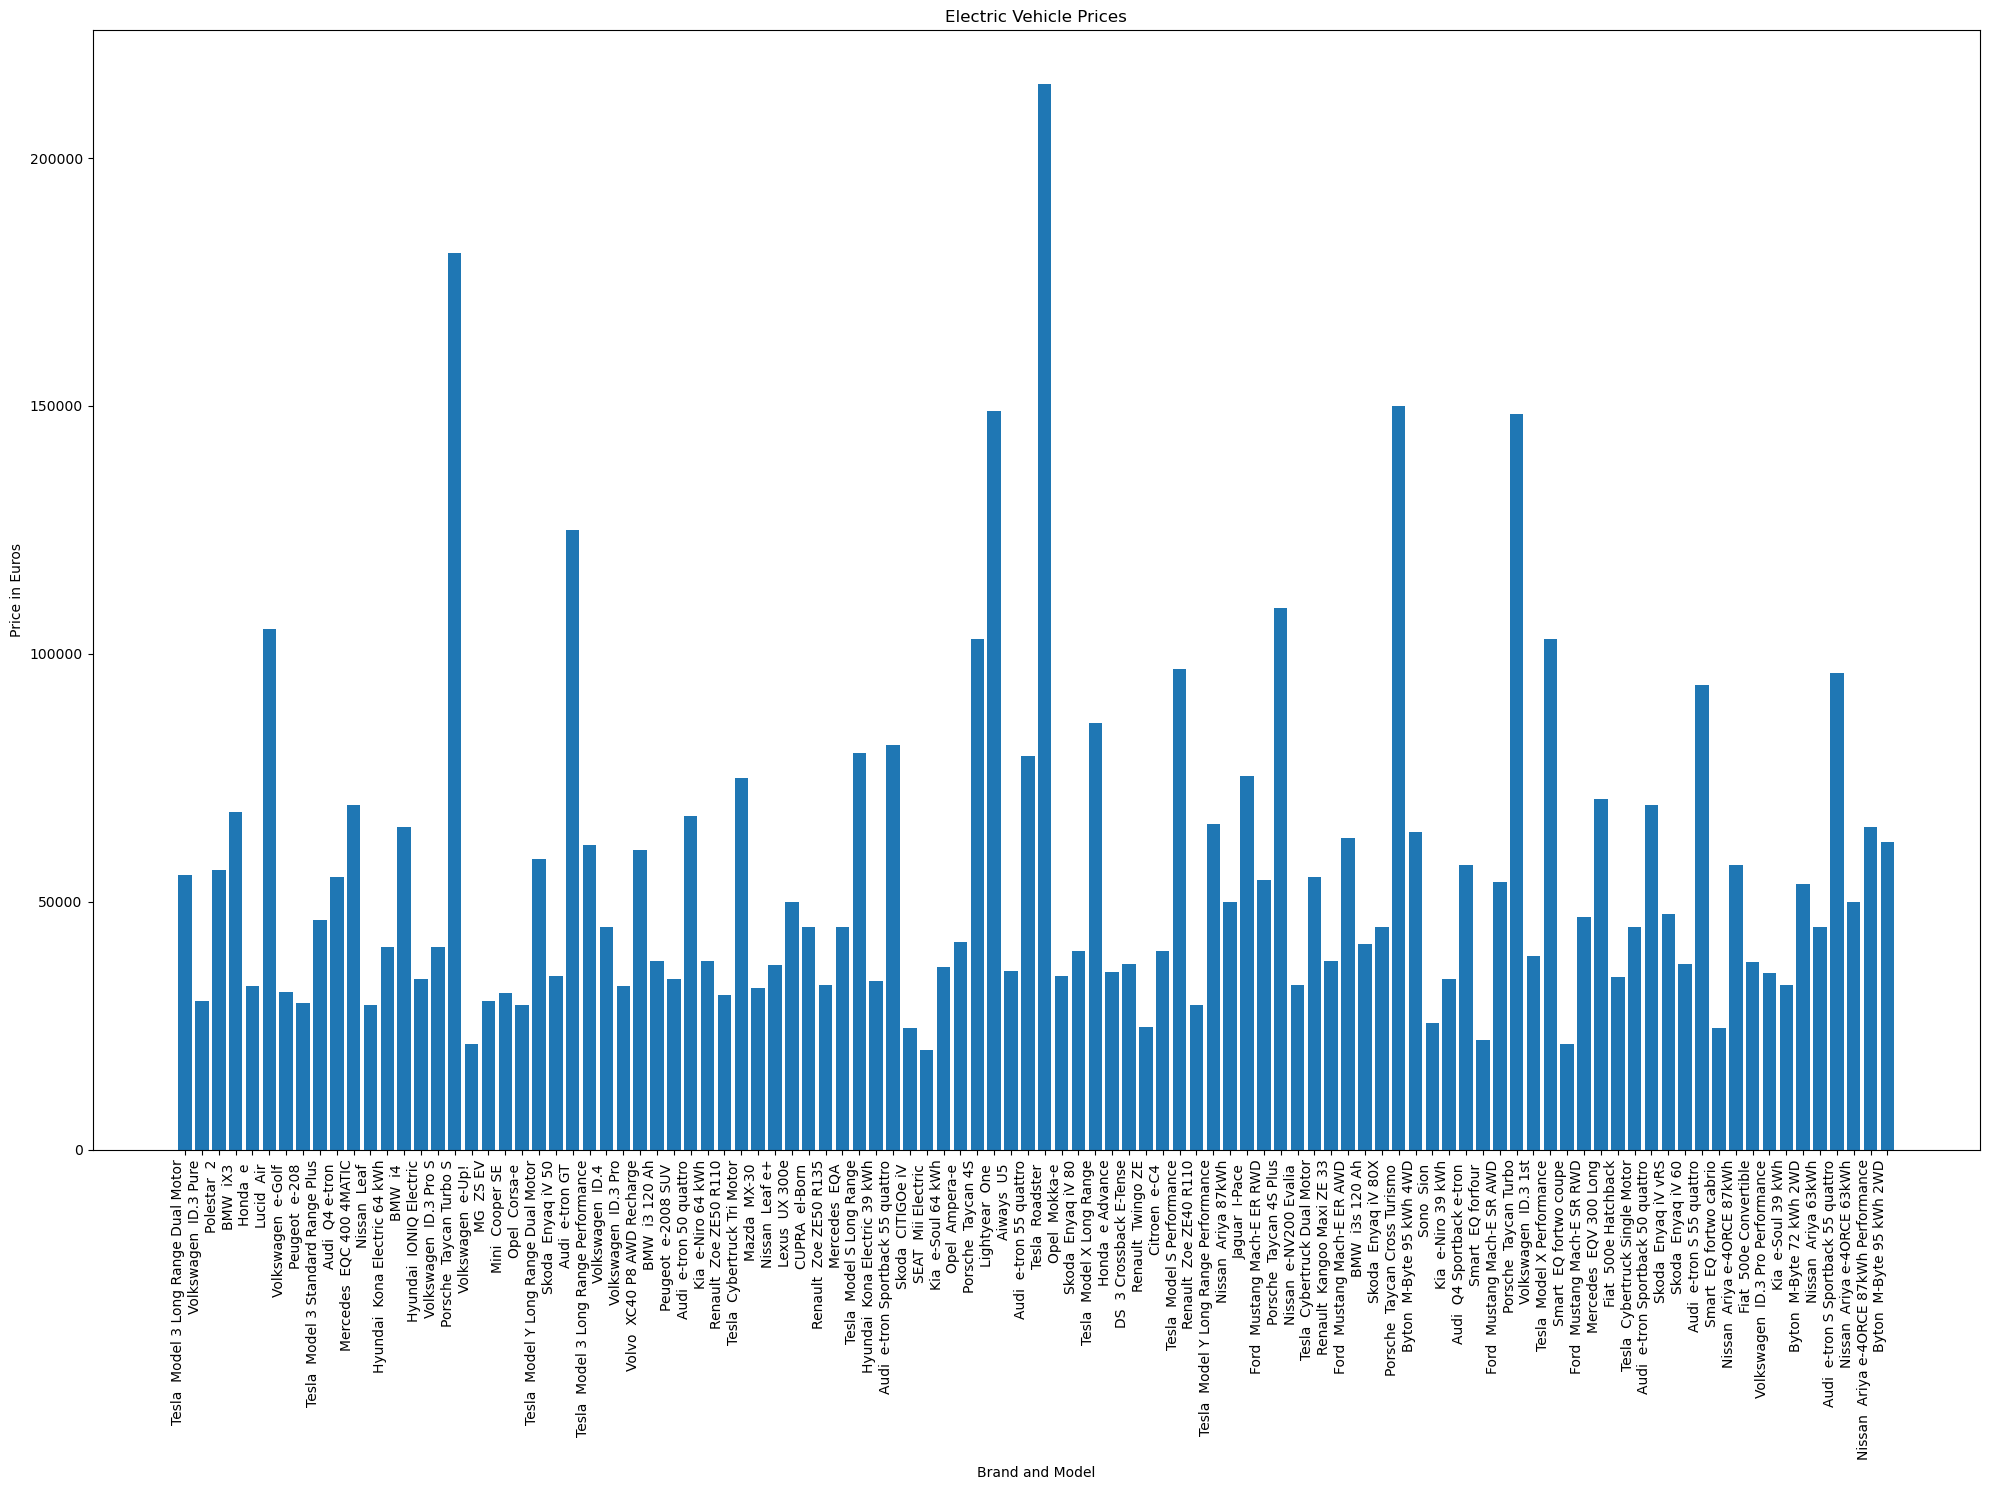

In [11]:
plt.figure(figsize=(20,15))
plt.bar(df['Brand'] + ' ' + df['Model'], df['PriceEuro'])
plt.xlabel('Brand and Model')
plt.ylabel('Price in Euros')
plt.title('Electric Vehicle Prices')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

In [13]:
brand_prices = df.groupby('Brand')['PriceEuro'].mean().reset_index()

In [14]:
brand_prices = brand_prices.sort_values(by='PriceEuro', ascending=True)

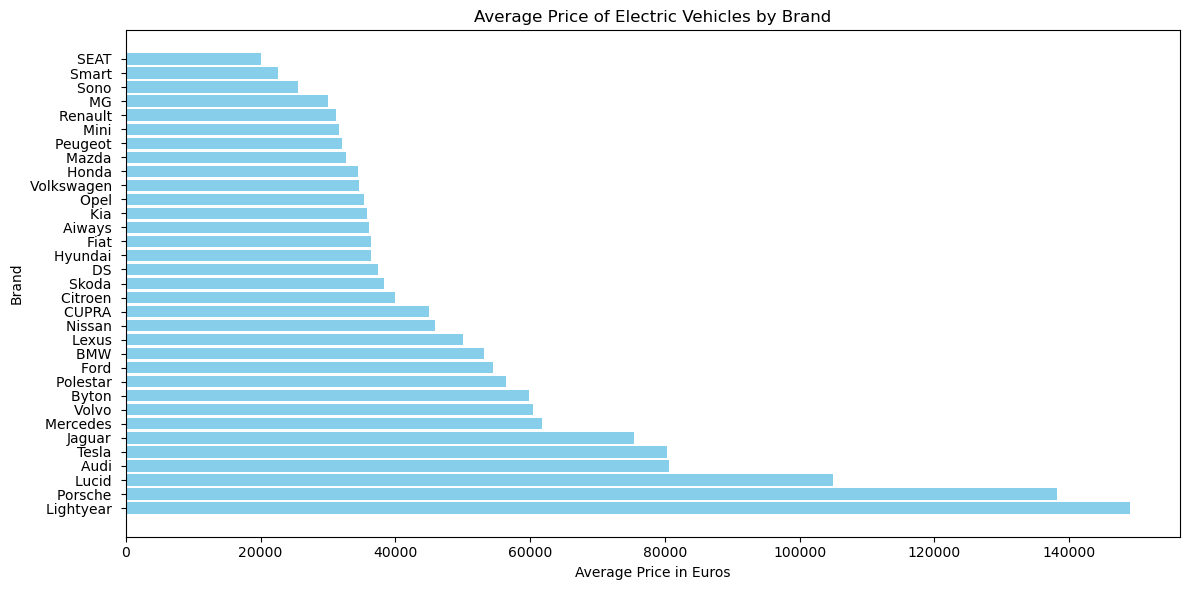

In [15]:
plt.figure(figsize=(12, 6))
plt.barh(brand_prices['Brand'], brand_prices['PriceEuro'], color='skyblue')
plt.xlabel('Average Price in Euros')
plt.ylabel('Brand')
plt.title('Average Price of Electric Vehicles by Brand')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [17]:
df_sorted = df.sort_values(by='Efficiency_WhKm', ascending=True)

In [18]:
top_n = 10
top_efficient_models = df_sorted.head(top_n)

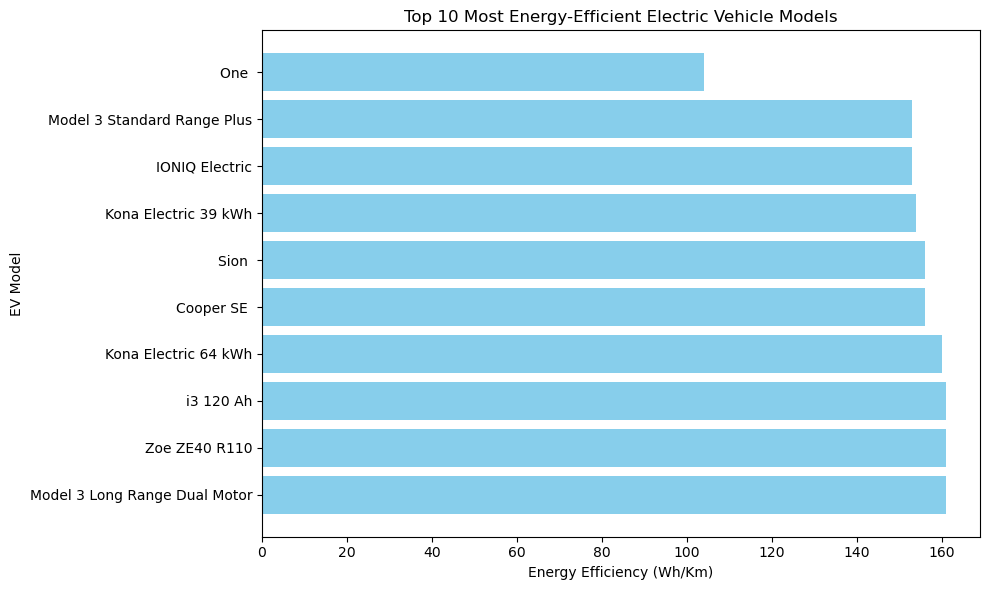

In [19]:
plt.figure(figsize=(10, 6))
plt.barh(top_efficient_models['Model'], top_efficient_models['Efficiency_WhKm'], color='skyblue')
plt.xlabel('Energy Efficiency (Wh/Km)')
plt.ylabel('EV Model')
plt.title(f'Top {top_n} Most Energy-Efficient Electric Vehicle Models')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

In [20]:
range_price_data = df[['Range_Km', 'PriceEuro']]

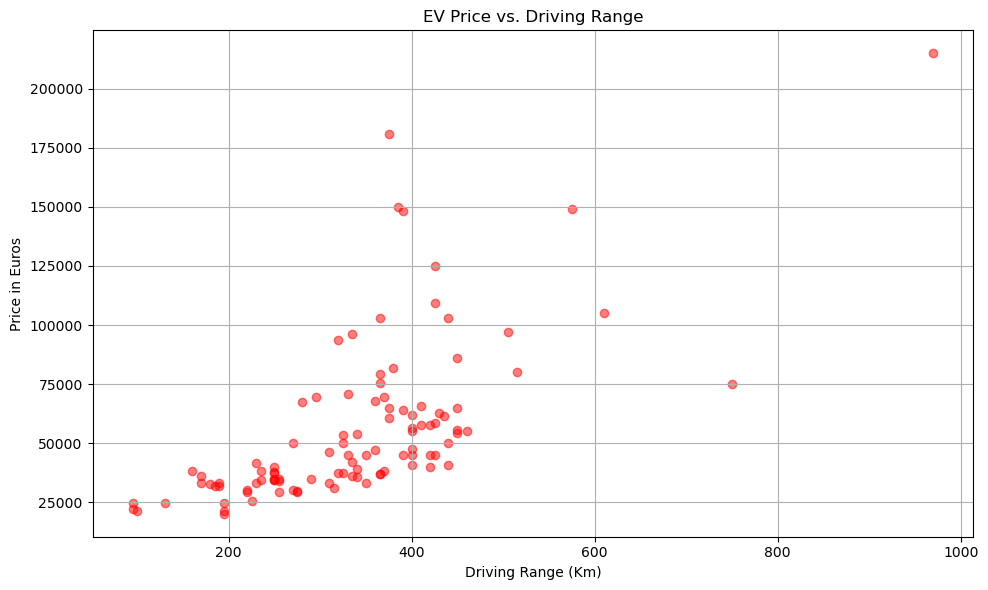

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(range_price_data['Range_Km'], range_price_data['PriceEuro'], color='red', alpha=0.5)
plt.xlabel('Driving Range (Km)')
plt.ylabel('Price in Euros')
plt.title('EV Price vs. Driving Range')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
fast_charge_counts = df.groupby(['Brand', 'FastCharge_KmH']).size().unstack(fill_value=0)
rapid_charge_counts = df.groupby(['Brand', 'RapidCharge']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
fast_charge_counts.sum(axis=1).plot(kind='bar', color='skyblue', alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models Supporting Fast Charging by Brand')

plt.subplot(1, 2, 2)
rapid_charge_counts.sum(axis=1).plot(kind='bar', color='lightcoral', alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Number of Models')
plt.title('Number of Models Supporting Rapid Charging by Brand')

plt.tight_layout()
plt.show()


# Data Segmentation 

In [27]:
segment_data = df.groupby('Segment').agg({
    'PriceEuro': 'mean',
    'Range_Km': 'mean',
    'Model': 'count'
}).reset_index()

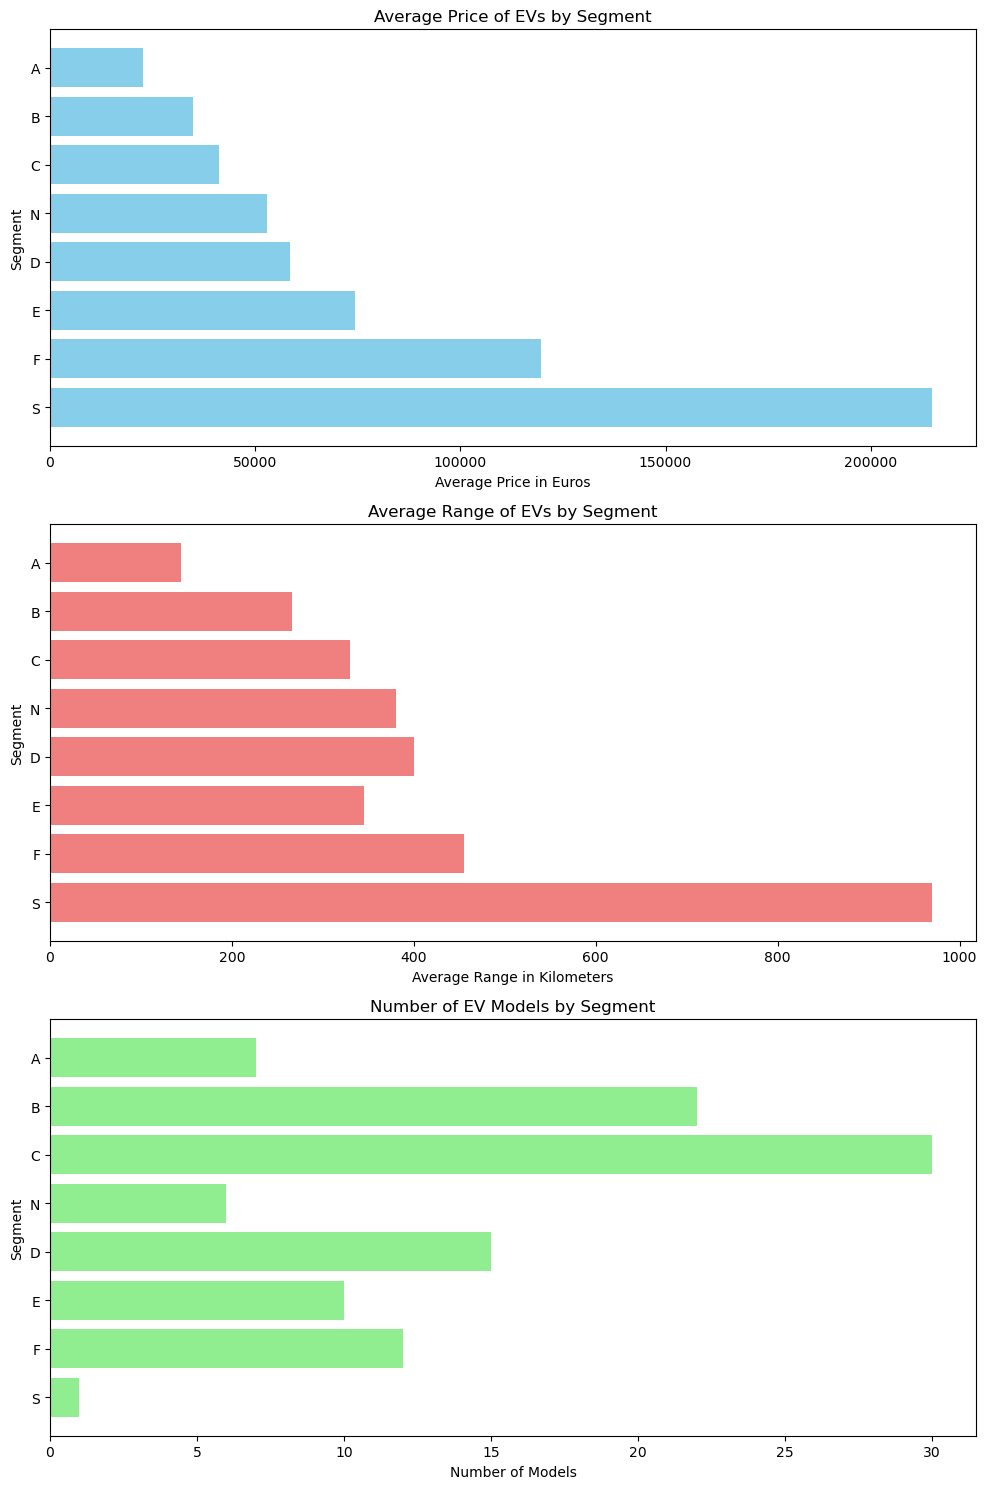

In [28]:
segment_data = segment_data.sort_values(by='PriceEuro', ascending=True)

# Creating subplots to visualize price, range, and count of models in each segment
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

axes[0].barh(segment_data['Segment'], segment_data['PriceEuro'], color='skyblue')
axes[0].set_xlabel('Average Price in Euros')
axes[0].set_ylabel('Segment')
axes[0].set_title('Average Price of EVs by Segment')
axes[0].invert_yaxis()  

axes[1].barh(segment_data['Segment'], segment_data['Range_Km'], color='lightcoral')
axes[1].set_xlabel('Average Range in Kilometers')
axes[1].set_ylabel('Segment')
axes[1].set_title('Average Range of EVs by Segment')
axes[1].invert_yaxis()  

axes[2].barh(segment_data['Segment'], segment_data['Model'], color='lightgreen')
axes[2].set_xlabel('Number of Models')
axes[2].set_ylabel('Segment')
axes[2].set_title('Number of EV Models by Segment')
axes[2].invert_yaxis() 

plt.tight_layout()
plt.show()

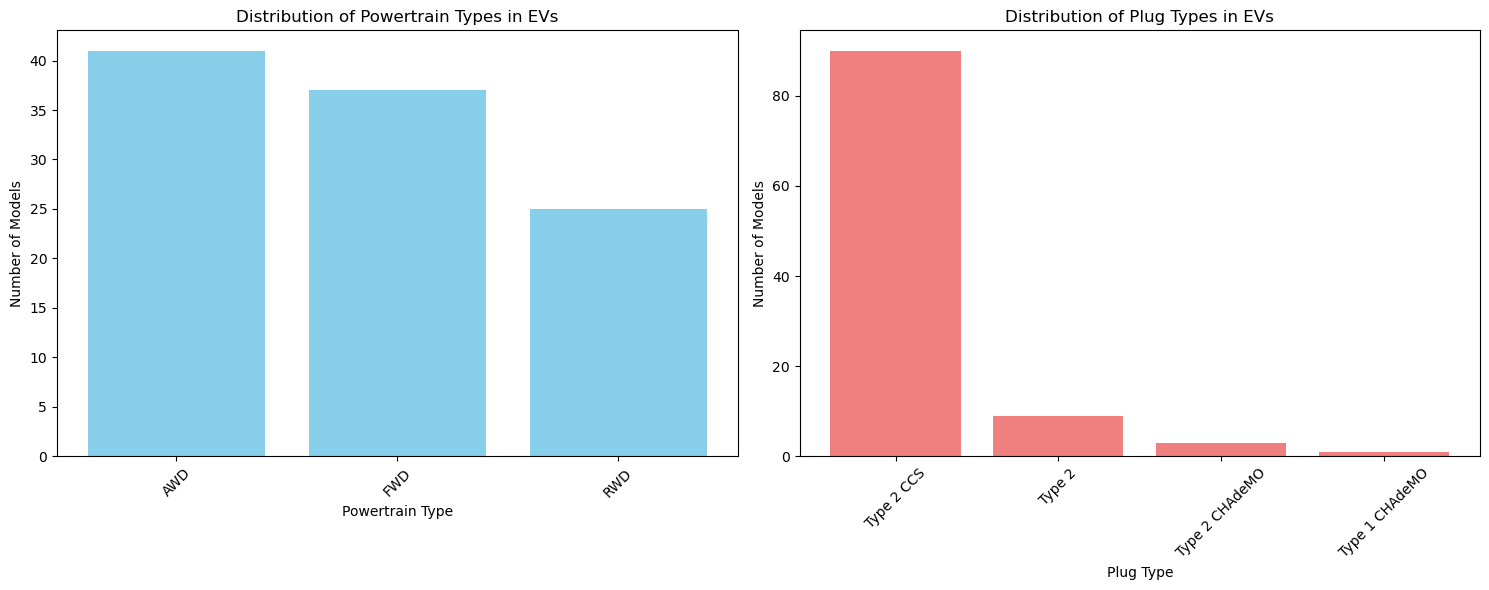

In [30]:
powertrain_counts = df['PowerTrain'].value_counts()

plug_type_counts = df['PlugType'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].bar(powertrain_counts.index, powertrain_counts.values, color='skyblue')
axes[0].set_xlabel('Powertrain Type')
axes[0].set_ylabel('Number of Models')
axes[0].set_title('Distribution of Powertrain Types in EVs')

axes[1].bar(plug_type_counts.index, plug_type_counts.values, color='lightcoral')
axes[1].set_xlabel('Plug Type')
axes[1].set_ylabel('Number of Models')
axes[1].set_title('Distribution of Plug Types in EVs')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# K-Mean clustering

In [32]:
selected_features = ['PriceEuro', 'Range_Km']
X = df[selected_features]

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than av

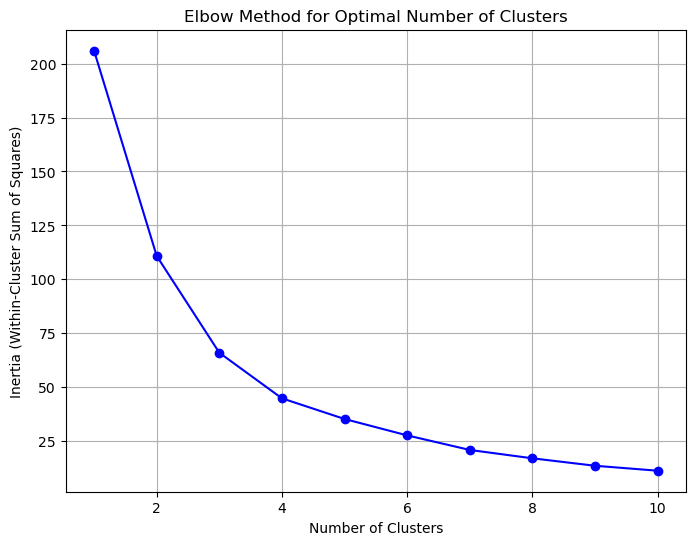

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [36]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


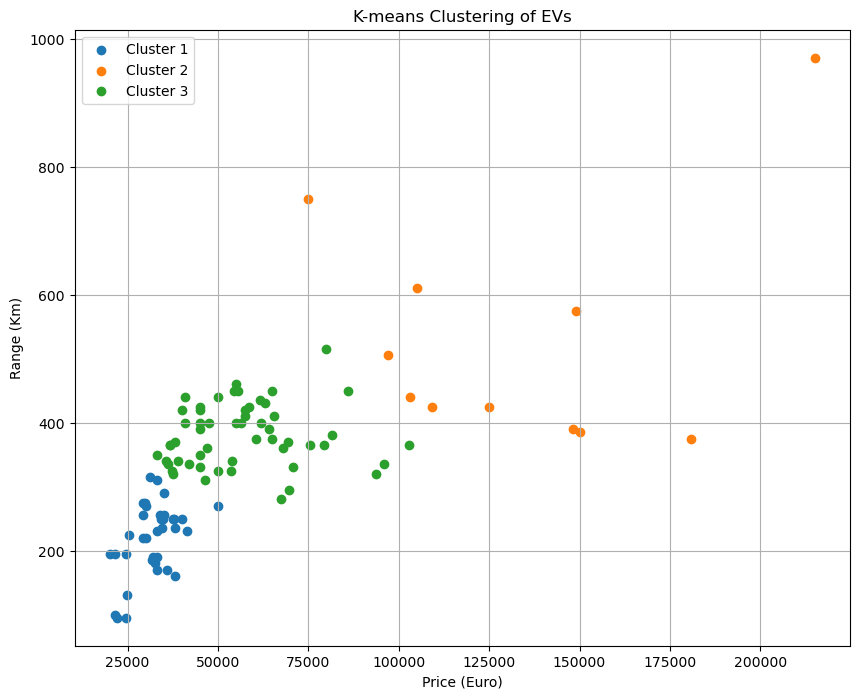

In [39]:
plt.figure(figsize=(10, 8))
for cluster in range(n_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['PriceEuro'], df[df['Cluster'] == cluster]['Range_Km'], label=f'Cluster {cluster + 1}')
plt.xlabel('Price (Euro)')
plt.ylabel('Range (Km)')
plt.title('K-means Clustering of EVs')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
brand_market_share = df.groupby('Brand').size().reset_index(name='Count')
total_ev_count = len(df)
print(total_ev_count)

103


In [42]:
brand_market_share['MarketShare'] = (brand_market_share['Count'] / total_ev_count) * 100
brand_market_share = brand_market_share.sort_values(by='MarketShare', ascending=False)


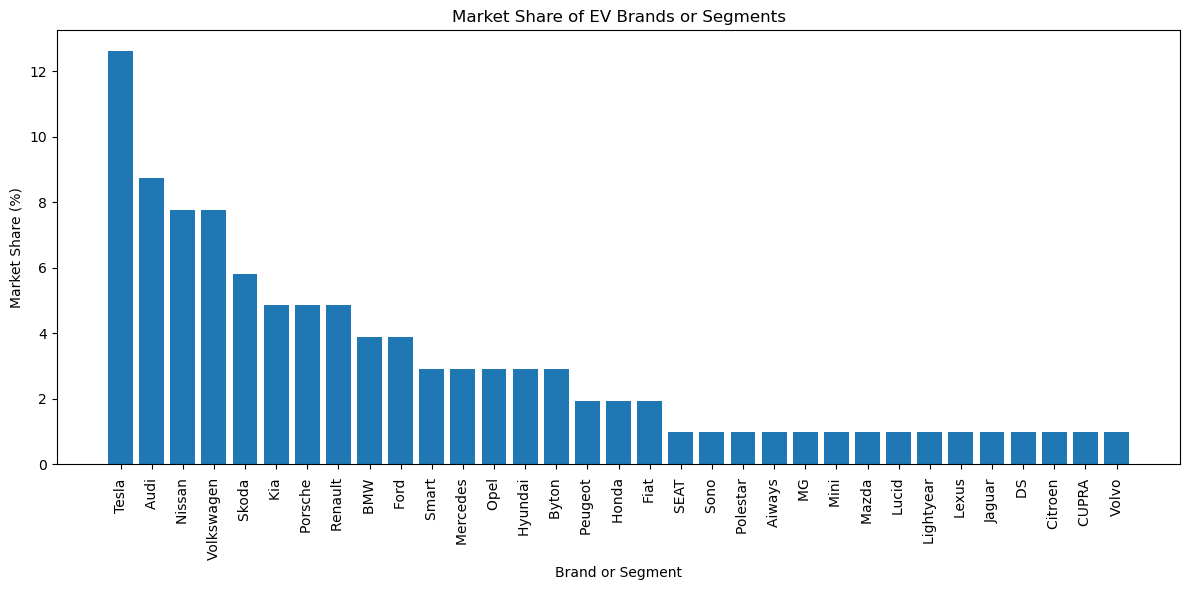

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(brand_market_share['Brand'], brand_market_share['MarketShare'])
plt.xlabel('Brand or Segment')
plt.ylabel('Market Share (%)')
plt.title('Market Share of EV Brands or Segments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Electric Vehicle Dataset Summary:

This dataset contains information about various electric vehicle (EV) models, providing details about their characteristics, features, and pricing. The dataset includes the following attributes:

Brand: The brand or manufacturer of the electric vehicle.

Model: The specific model name of the electric vehicle.

AccelSec: The acceleration time from 0 to 100 km/h (or 0 to 60 mph) in seconds, representing the vehicle's speed performance.

TopSpeed_KmH: The maximum achievable speed of the vehicle in kilometers per hour.

Range_Km: The driving range on a single charge in kilometers, indicating how far the EV can travel before needing to recharge.

Efficiency_WhKm: Energy efficiency in watt-hours per kilometer, which measures how efficiently the vehicle uses electricity for propulsion.
    
FastCharge_KmH: The speed at which the vehicle can be fast-charged in kilometers per hour, indicating how quickly the battery can be replenished.

RapidCharge: A binary indicator (Yes/No) that denotes whether the vehicle supports rapid charging.

PowerTrain: The type of powertrain used in the vehicle, such as All-Wheel Drive (AWD) or Rear-Wheel Drive (RWD).

PlugType: The type of charging plug used for recharging the vehicle.

BodyStyle: The body style of the EV, which can include Sedan, SUV, Hatchback, and more.

Segment: A classification of the vehicle into market segments (e.g., A, B, C, D, E, F) based on size and features.

Seats: The number of seats available in the vehicle.
    
    
PriceEuro: The price of the electric vehicle in Euros.

Potential Analyses and Insights:

Price Comparison: Analyze the average prices of EVs across different brands to identify which brands offer more affordable or more expensive models.

Efficiency Analysis: Investigate the energy efficiency (Efficiency_WhKm) of EVs to find which models are the most efficient in terms of energy consumption.

Range vs. Price: Explore the relationship between the driving range (Range_Km) and the price of EVs to see if higher-priced models generally offer longer ranges.

Charging Capabilities: Examine the availability of fast charging and rapid charging options among different EV models and brands.
    
Segment Analysis: Group EVs by market segment (Segment) and analyze how prices, ranges, and features differ across segments (e.g., SUVs vs. Sedans).

Powertrain and Plug Type: Investigate the popularity of different powertrain types and plug types among EVs.

Market Trends: Identify market trends in the electric vehicle industry, such as the emergence of more affordable models or improvements in energy efficiency.

Market Share Analysis: Analyze the market share of different brands or segments within the electric vehicle market over time to identify market leaders and trends.

These analyses can provide valuable insights into the electric vehicle market, helping consumers make informed choices, manufacturers refine their offerings, and policymakers support sustainable transportation initiatives.